In [1]:
pip install ydata-profiling

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport


dados = pd.read_csv('/content/teste_indicium_precificacao.csv')

In [3]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48894 entries, 0 to 48893
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             48894 non-null  int64  
 1   nome                           48878 non-null  object 
 2   host_id                        48894 non-null  int64  
 3   host_name                      48873 non-null  object 
 4   bairro_group                   48894 non-null  object 
 5   bairro                         48894 non-null  object 
 6   latitude                       48894 non-null  float64
 7   longitude                      48894 non-null  float64
 8   room_type                      48894 non-null  object 
 9   price                          48894 non-null  int64  
 10  minimo_noites                  48894 non-null  int64  
 11  numero_de_reviews              48894 non-null  int64  
 12  ultima_review                  38842 non-null 

In [4]:
dados.describe()

,id,host_id,latitude,longitude,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
count,4.889400e+04,4.889400e+04,48894.000000,48894.000000,48894.000000,48894.000000,48894.000000,38842.000000,48894.000000,48894.000000
mean,1.901753e+07,6.762139e+07,40.728951,-73.952169,152.720763,7.030085,23.274758,1.373251,7.144005,112.776169
std,1.098288e+07,7.861118e+07,0.054529,0.046157,240.156625,20.510741,44.550991,1.680453,32.952855,131.618692
min,2.595000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.472371e+06,7.822737e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967743e+07,3.079553e+07,40.723075,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915225e+07,1.074344e+08,40.763117,-73.936273,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [5]:
qtde_nulos = dados.isnull().sum()

print(qtde_nulos)

id                                   0
nome                                16
host_id                              0
host_name                           21
bairro_group                         0
bairro                               0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimo_noites                        0
numero_de_reviews                    0
ultima_review                    10052
reviews_por_mes                  10052
calculado_host_listings_count        0
disponibilidade_365                  0
dtype: int64


#**Ajustando valores nulos das colunas ultima review e reviews por mês, alocando valor 0 para review por mês e uma data longinqua para ultima review, desta forma, nos dados isto reflete que não houve locação recentemente.**

In [6]:
dados['reviews_por_mes'].fillna(0, inplace=True)



In [7]:
dados['ultima_review'].fillna('01-01-1900', inplace=True)


#Ajustando os valores nulos das colunas host_name e nome para Não Informado

In [8]:
dados[['host_name', 'nome']] = dados[['host_name', 'nome']].fillna("Não Informado")



In [9]:
qtde_nulos = dados.isnull().sum()

print(qtde_nulos)

id                               0
nome                             0
host_id                          0
host_name                        0
bairro_group                     0
bairro                           0
latitude                         0
longitude                        0
room_type                        0
price                            0
minimo_noites                    0
numero_de_reviews                0
ultima_review                    0
reviews_por_mes                  0
calculado_host_listings_count    0
disponibilidade_365              0
dtype: int64


#Utilizaremos a função ProfileReport, da biblioteca ydata-profiling para gerarmos insights sobre os dados.

In [10]:
profile = ProfileReport (dados, title="EDA")

In [11]:
#profile

#Resumo da análise exploratória



* Existem 48.894 registros no conjunto de dados.
* A média do preço do aluguel é de aproximadamente $152.72.

* Um desvio padrão de $240.16, indicando uma variabilidade considerável nos preços.

* O número médio mínimo de noites para reserva é de aproximadamente 7, com um máximo de 10.000 noites (o valor máximo nos mostra possíveis outliers em nosso dataset).
* A média de avaliações por mês é de aproximadamente 23, com um máximo de 629 avaliações por mês.
* A média do número de propriedades listadas pelo host é de aproximadamente 7, com um máximo de 58.
* A média de disponibilidade ao longo do ano é de aproximadamente 113 dias, com um máximo de 365 dias.



#Após este resumo das estatísticas de nosso conjunto de dados, vamos visualizar algumas informações.

# Vamos analisar com um histograma a distribuição dos preços

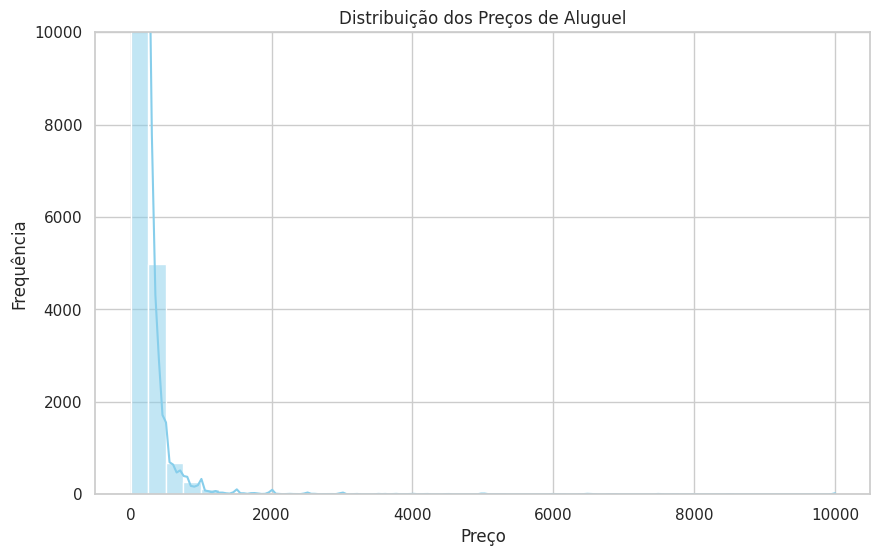

In [12]:

sns.set(style="whitegrid")


plt.figure(figsize=(10, 6))
sns.histplot(dados['price'], bins=40, kde=True, color='skyblue')
plt.title('Distribuição dos Preços de Aluguel')
plt.xlabel('Preço')
plt.ylabel('Frequência')
plt.ylim(0, 10000)
plt.show()


#Vamos visualizar a distribuição dos imóveis em um mapa usando as coordenadas de latitude e longitude.

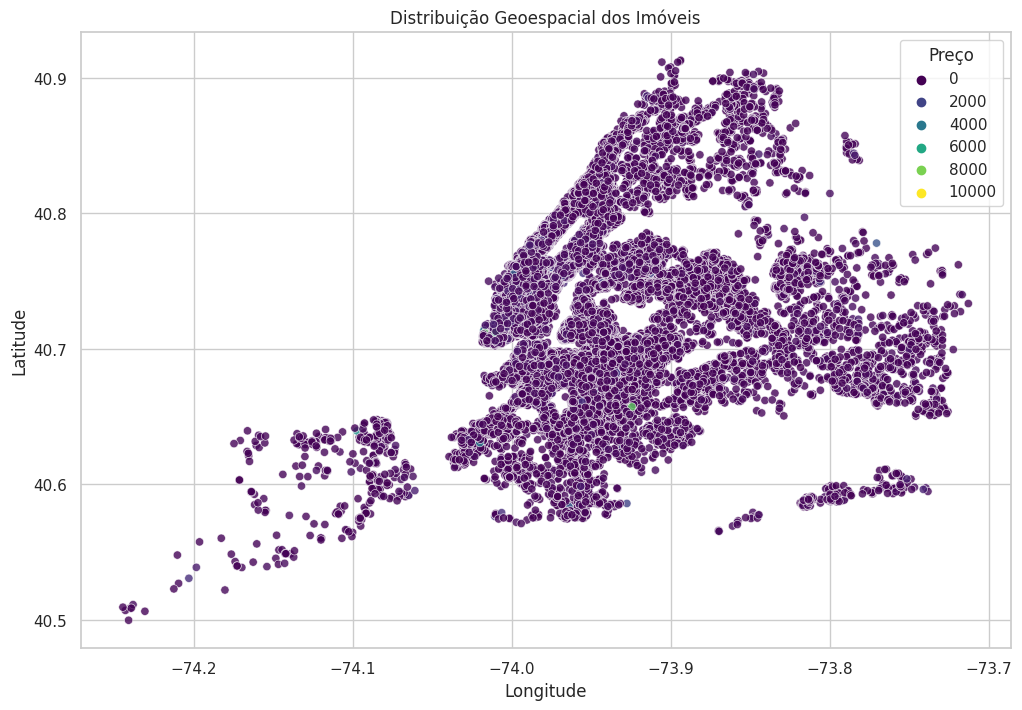

In [13]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='longitude', y='latitude', data=dados, hue='price', palette='viridis', alpha=0.8)
plt.title('Distribuição Geoespacial dos Imóveis')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Preço', loc='upper right')
plt.show()


#Vamos visualizar as distribuições entre nossas variáveis categóricas.

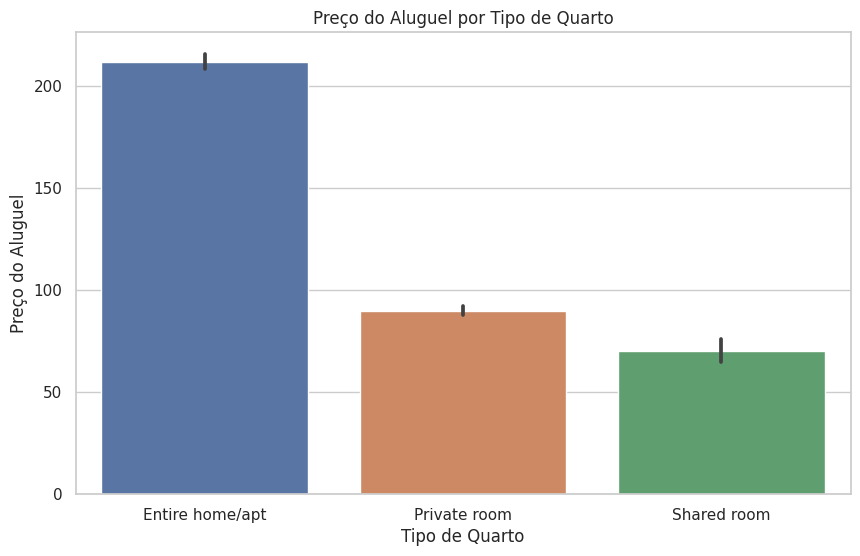

In [14]:
plt.figure(figsize=(10, 6))
sns.barplot(x='room_type', y='price', data=dados)
plt.title('Preço do Aluguel por Tipo de Quarto')
plt.xlabel('Tipo de Quarto')
plt.ylabel('Preço do Aluguel')
plt.show()



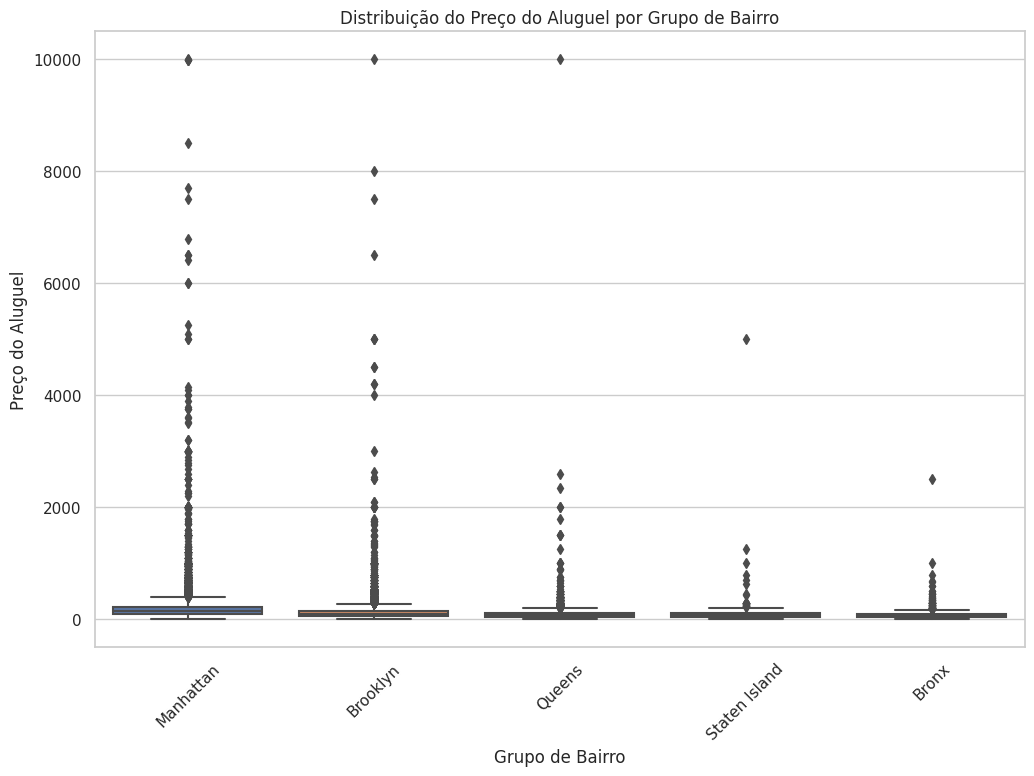

In [15]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='bairro_group', y='price', data=dados)
plt.title('Distribuição do Preço do Aluguel por Grupo de Bairro')
plt.xlabel('Grupo de Bairro')
plt.ylabel('Preço do Aluguel')
plt.xticks(rotation=45)
plt.show()



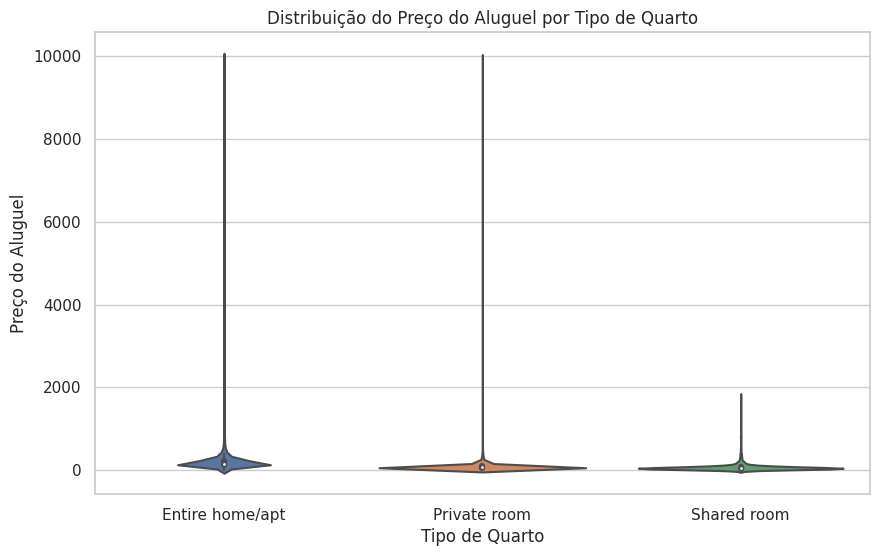

In [16]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='room_type', y='price', data=dados)
plt.title('Distribuição do Preço do Aluguel por Tipo de Quarto')
plt.xlabel('Tipo de Quarto')
plt.ylabel('Preço do Aluguel')
plt.show()

In [17]:
correlation_matrix = dados.corrwith(dados['price'])

sorted_correlation = correlation_matrix.sort_values(ascending=False)

print(sorted_correlation)


price                            1.000000
disponibilidade_365              0.081833
calculado_host_listings_count    0.057472
minimo_noites                    0.042799
latitude                         0.033939
host_id                          0.015309
id                               0.010618
numero_de_reviews               -0.047954
reviews_por_mes                 -0.050564
longitude                       -0.150020
dtype: float64


<ipython-input-17-234e5e605d17>:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = dados.corrwith(dados['price'])


<ipython-input-18-724632e753a6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = dados.corr()


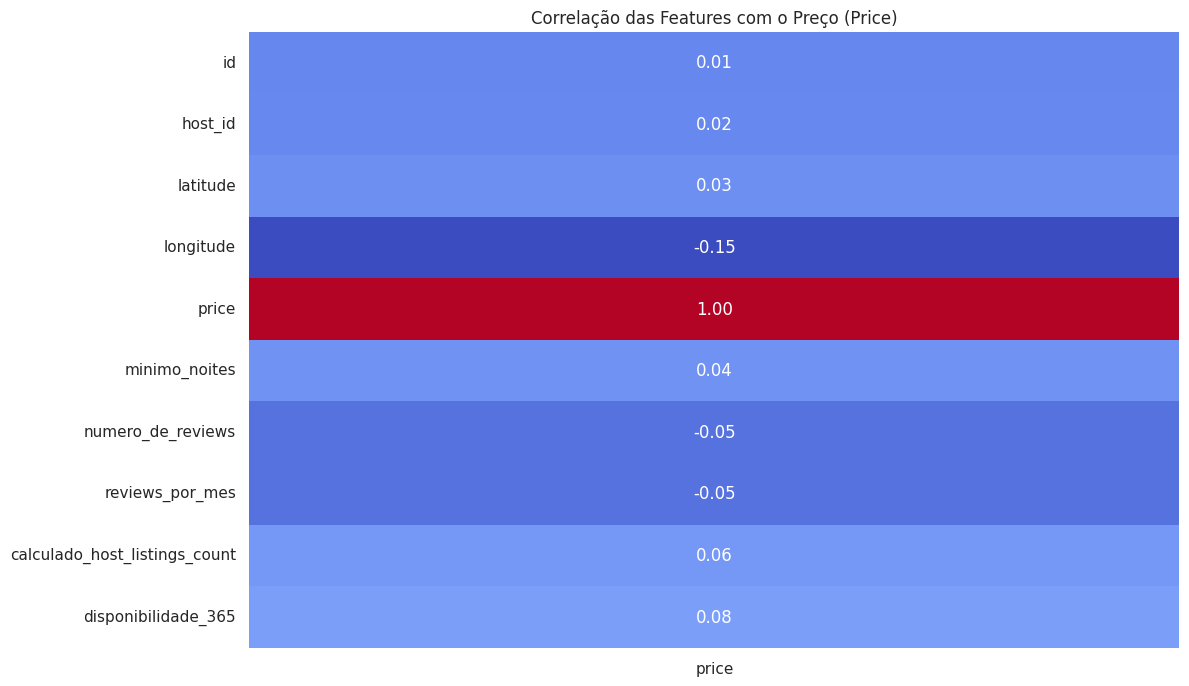

In [18]:
correlation_matrix = dados.corr()


price_correlation = correlation_matrix['price']

plt.figure(figsize=(12, 8))
sns.heatmap(price_correlation.to_frame(), cmap='coolwarm', annot=True, fmt=".2f", cbar=False)
plt.title('Correlação das Features com o Preço (Price)')
plt.show()

In [19]:
disponibilidade_media_por_bairro = dados.groupby('bairro')['disponibilidade_365'].mean().reset_index()

total_reviews_por_bairro = dados.groupby('bairro')['numero_de_reviews'].sum().reset_index()

minimo_noites_por_bairro = dados.groupby('bairro')['minimo_noites'].mean().reset_index()

bairros_info = disponibilidade_media_por_bairro.merge(total_reviews_por_bairro, on='bairro')
bairros_info = bairros_info.merge(minimo_noites_por_bairro, on='bairro')

bairros_ordenados = bairros_info.sort_values(by=['disponibilidade_365', 'numero_de_reviews', 'minimo_noites'], ascending=[True, False, True])

print(bairros_ordenados.head(5))


                         bairro  disponibilidade_365  numero_de_reviews  \
9    Bay Terrace, Staten Island             0.000000                  3   
141                    New Dorp             0.000000                  0   
219                     Woodrow             0.000000                  0   
57            Downtown Brooklyn            39.481928               1188   
130         Morningside Heights            43.054913               4599   

     minimo_noites  
9        16.500000  
141       1.000000  
219       7.000000  
57        5.891566  
130       5.716763  


In [20]:
media_precos_por_bairro = dados.groupby('bairro')['price'].mean()

bairros_maiores_precos = media_precos_por_bairro.sort_values(ascending=False)

bairros_maiores_precos.head(25)


bairro
Fort Wadsworth        800.000000
Woodrow               700.000000
Tribeca               490.638418
Sea Gate              487.857143
Riverdale             442.090909
Prince's Bay          409.500000
Battery Park City     367.557143
Flatiron District     341.925000
Randall Manor         336.000000
NoHo                  295.717949
SoHo                  287.103352
Midtown               282.719094
Neponsit              274.666667
West Village          267.682292
Greenwich Village     263.405612
Chelsea               249.738544
Willowbrook           249.000000
Theater District      248.013889
Nolita                230.138340
Financial District    225.490591
Gramercy              222.754438
Little Italy          222.066116
Murray Hill           220.958763
Breezy Point          213.333333
Cobble Hill           211.929293
Name: price, dtype: float64

#Responda também às seguintes perguntas:
#Supondo que uma pessoa esteja pensando em investir em um apartamento para alugar na plataforma, onde seria mais indicada a compra?



*   Ao levarmos em consideração disponibilidade, número de reviews e mínimo de noites como fatores que impactam no aluguel ( apesar de ser uma correlação fraca - conforme mostra nossa matriz de correlação), chega-se em Downtown Brooklyn, com apenas 39 dias de disponibilidade, 1188 reviews e média de 6 noites.




#O número mínimo de noites e a disponibilidade ao longo do ano interferem no preço?




*  A correlação de ambos é fraca, possuem uma influência limitada no preço.






#Existe algum padrão no texto do nome do local para lugares de mais alto valor?


* Ao ordenar os bairros pelo valor de aluguel de forma descrescente, não foi identificado padrão no nome que defina ou tenha correlação com o valor do aluguel.



#Explique como você faria a previsão do preço a partir dos dados. Quais variáveis e/ou suas transformações você utilizou e por quê? Qual tipo de problema estamos resolvendo (regressão, classificação)? Qual modelo melhor se aproxima dos dados e quais seus prós e contras? Qual medida de performance do modelo foi escolhida e por quê?



* Após uma análise detalhada dos dados, identificamos as seguintes variáveis como sendo potencialmente relevantes para a previsão de preços de aluguéis:
Latitude e Longitude: Para capturar a localização geográfica do imóvel.
Tipo de Quarto (Room Type): Uma variável categórica que indica o tipo de quarto disponível para aluguel.
Mínimo de Noites (Minimum Nights): O número mínimo de noites necessárias para alugar o imóvel.
Número de Reviews (Number of Reviews): O número total de avaliações do imóvel feitas pelos usuários.
Reviews por Mês (Reviews per Month): O número médio de avaliações recebidas pelo imóvel por mês.

* Tipo de Problema:
Estamos resolvendo um problema de regressão, onde nosso objetivo é prever um valor numérico (o preço do aluguel).

* Modelo de Regressão: um modelo que se adequa ao problema é o Random Forest, pois são capazes de capturar relações não lineares nos dados.

* Medida de Performance: recomenda-se utilizar o Erro Quadrático Médio (MSE) como medida de performance principal para avaliar a precisão do nosso modelo. O MSE mede a média dos quadrados dos erros entre os valores previstos e os valores reais de preço de aluguéis.



#Ajustando dataset para aplicarmos o modelo de regressão


*   Vamos remover as variáveis bairro_group e bairro, são redundantes com latitude e longitude;Também vamos excluir as variáveis nome porque é irrelevante em nossa predição
*   Vamos utilizar o método one-hot-encoding para transformar os dados da variável room_type em numérico;
*   Por fim, vamos ajustar a variável ultima_review para modelo de data;



In [21]:
# Substituir os valores de string 'NA' por NaN (valores nulos)
dados['ultima_review'] = dados['ultima_review'].replace('NA', np.nan)

# Converter a coluna "ultima_review" para o formato de data
dados['ultima_review'] = pd.to_datetime(dados['ultima_review'])

# Defina a data de referência
data_referencia = pd.to_datetime('2024-09-02')

# Calcular a diferença em dias desde a data de referência
dados['ultima_review'] = (data_referencia - dados['ultima_review']).dt.days


In [22]:
# Excluir as variáveis irrelevantes
dados_limpos = dados.drop(['nome', 'host_id', 'host_name', 'bairro_group', 'bairro'], axis=1)


In [23]:
# Aplicar one-hot-encoding na variável 'room_type'
dados_limpos = pd.get_dummies(dados_limpos, columns=['room_type'], prefix='room_type')


In [24]:
#Verificando se não há variáveis
dados_limpos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48894 entries, 0 to 48893
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             48894 non-null  int64  
 1   latitude                       48894 non-null  float64
 2   longitude                      48894 non-null  float64
 3   price                          48894 non-null  int64  
 4   minimo_noites                  48894 non-null  int64  
 5   numero_de_reviews              48894 non-null  int64  
 6   ultima_review                  48894 non-null  int64  
 7   reviews_por_mes                48894 non-null  float64
 8   calculado_host_listings_count  48894 non-null  int64  
 9   disponibilidade_365            48894 non-null  int64  
 10  room_type_Entire home/apt      48894 non-null  uint8  
 11  room_type_Private room         48894 non-null  uint8  
 12  room_type_Shared room          48894 non-null 

#Implementação do modelo de regressão

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Dividir os dados em conjunto de treinamento e conjunto de teste
X = dados_limpos.drop('price', axis=1)  # Recursos (features)
y = dados_limpos['price']  # Variável alvo

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar o modelo de regressão de árvore de decisão
dt_regressor = DecisionTreeRegressor(random_state=42)

# Treinar o modelo com os dados de treinamento
dt_regressor.fit(X_train, y_train)

# Fazer previsões nos dados de teste
y_pred_dt = dt_regressor.predict(X_test)

# Avaliar o desempenho do modelo de árvore de decisão
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = mean_squared_error(y_test, y_pred_dt, squared=False)

print("Decision Tree Regressor Metrics:")
print(f"Mean Squared Error (MSE): {mse_dt}")
print(f"Root Mean Squared Error (RMSE): {rmse_dt}")


Decision Tree Regressor Metrics:
Mean Squared Error (MSE): 79899.89160445853
Root Mean Squared Error (RMSE): 282.66568876405665


#Análise do modelo de regressão frente aos dados estatísticos do dataset



* Desempenho do Modelo:

O modelo de regressão de árvore de decisão apresentou um MSE (Mean Squared Error) de aproximadamente 79,899.89 e um RMSE (Root Mean Squared Error) de aproximadamente 282.67. O MSE representa a média dos quadrados dos erros entre os valores previstos e os valores reais de aluguel.

O valor elevado do MSE sugere que o modelo pode estar sofrendo de uma quantidade significativa de erro médio quadrático.

O RMSE, que é a raiz quadrada do MSE, indica uma média de desvio de cerca de 282.67 nos valores previstos em relação aos valores reais de aluguel. Embora esse valor seja relativamente pequeno em relação à média do preço do aluguel (152.72), ainda representa uma considerável variabilidade nos erros de previsão.

* Comparação com os Dados Estatísticos:

A média do preço do aluguel no conjunto de dados é de aproximadamente 152.72, enquanto o desvio padrão é de 240.16.
A comparação entre o desvio padrão dos preços reais e o RMSE do modelo indica que o modelo está conseguindo prever os preços com uma precisão moderada, considerando a variabilidade presente nos dados reais.
No entanto, é importante ressaltar que o valor do RMSE ainda está significativamente acima da média do preço do aluguel, o que sugere que o modelo pode não estar capturando completamente as nuances nos dados que influenciam os preços.